<a href="https://colab.research.google.com/github/Sid-Yo/Amazon_Product_Recommendation/blob/master/Amazon_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import numpy as np
import pandas as pd
ama_data = pd.read_csv('amazon_transaction.csv',index_col = 0)
ama_data.head(5)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
NaN,NaN,NaN,NaN,NaN,NaN
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clearing unrequired data (NaN)

In [ ]:
amazon_data=ama_data.dropna()
amazon_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#Clearing unrequired data
Removed enteries with no order ID 

In [ ]:
amazon_data.drop(["Order ID"], inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Converting entire price column in float format

In [ ]:
amazon_data['Price Each'] = amazon_data['Price Each'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Updating dataframe 
Shifted order id column for future references


In [ ]:
azn_data=amazon_data.reset_index(drop=False)
azn_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
6,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
7,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
9,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


Rearranging dataframe according to price
- this will help to recommend cheap products with costly products



In [ ]:
azn_data.sort_values(["Price Each"], axis=0, ascending=False, inplace=True)
azn_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
159359,264454,Macbook Pro Laptop,1,1700.0,10/24/19 16:22,"49 Highland St, Los Angeles, CA 90001"
30818,296210,Macbook Pro Laptop,1,1700.0,12/18/19 11:41,"763 Cherry St, San Francisco, CA 94016"
139385,281623,Macbook Pro Laptop,1,1700.0,11/04/19 08:22,"969 Wilson St, Dallas, TX 75001"
182921,256433,Macbook Pro Laptop,1,1700.0,09/19/19 10:55,"586 12th St, Los Angeles, CA 90001"
106912,164076,Macbook Pro Laptop,1,1700.0,03/09/19 11:21,"908 Forest St, San Francisco, CA 94016"


# Merging Products with same order ID
Here products with same order ID were merged in a single cell

Unwanted data was removed

In [ ]:
data_amazon= azn_data.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x.astype(str))).reset_index()
data_amazon.head()

,Order ID,Product
0,141234,iPhone
1,141235,Lightning Charging Cable
2,141236,Wired Headphones
3,141237,27in FHD Monitor
4,141238,Wired Headphones


# Spliting the merged data
Products grouped in a single cell is splited into many column and removed order ID


In [ ]:
data_amazon = data_amazon['Product'].str.split(',', expand = True)
data_amazon.head()

,0,1,2,3,4
0,iPhone,None,None,None,None
1,Lightning Charging Cable,None,None,None,None
2,Wired Headphones,None,None,None,None
3,27in FHD Monitor,None,None,None,None
4,Wired Headphones,None,None,None,None


#Clearing data
- removed data of single bought product
- removed columns of three or more bought product

In [ ]:
data_amazon=data_amazon.dropna(subset =[1]).reset_index(drop=True)
data_amazon.drop(data_amazon.columns[2:],axis=1,inplace=True)
data_amazon

,0,1
0,Wired Headphones,USB-C Charging Cable
1,Apple Airpods Headphones,AA Batteries (4-pack)
2,Vareebadd Phone,Wired Headphones
3,Google Phone,USB-C Charging Cable
4,Google Phone,Bose SoundSport Headphones
...,...,...
7131,Macbook Pro Laptop,Wired Headphones
7132,Google Phone,Wired Headphones
7133,iPhone,Wired Headphones
7134,iPhone,Lightning Charging Cable


Column 0 contains products with higher price as compared with products of column 1

# Which product is often bought?

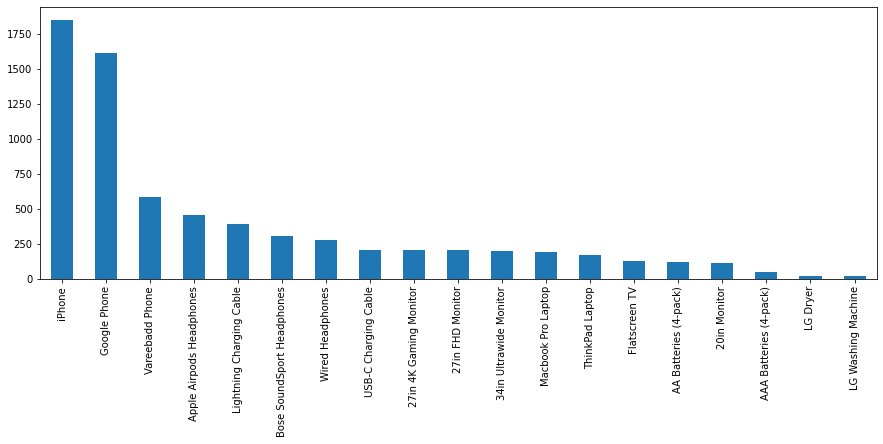

In [ ]:
max_prod=data_amazon[0].value_counts()
max_prod.plot(kind="bar",figsize=(15,5))

# Generating recomendations for iphone

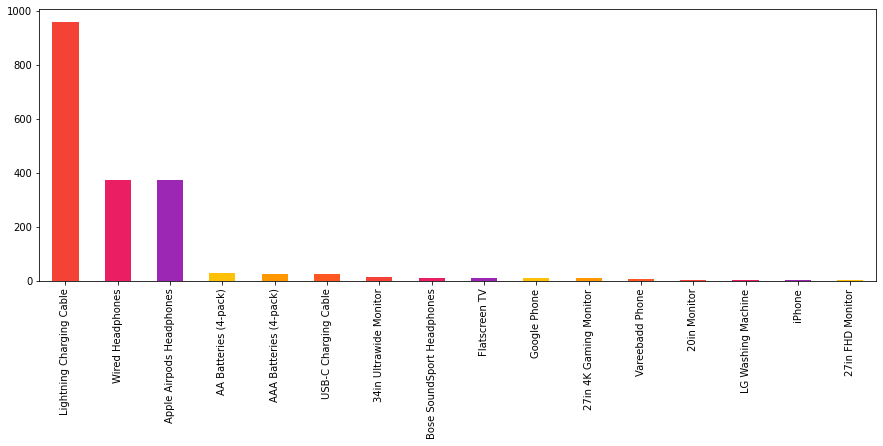

In [ ]:
colors=['#F44336','#E91E63','#9C27B4','#FFC107','#FF9800','#FF5722']
iphone_idx = data_amazon[0] == "iPhone"
iphone_data = data_amazon[iphone_idx]
iphone_recommend=iphone_data[1].value_counts()
iphone_recommend.plot(kind='bar',figsize=(15,5),color=colors)

This shows "Lighting Charging Cable" is highly recommended for iphone

# Generating recomendations for Google phone

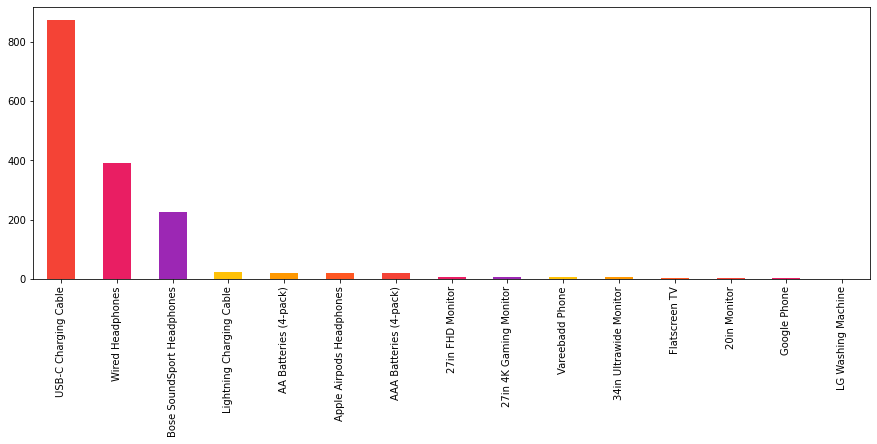

In [ ]:
gphone_idx = data_amazon[0] == "Google Phone"
gphone_data = data_amazon[gphone_idx]
gphone_recommend=gphone_data[1].value_counts()
gphone_recommend.plot(kind='bar',figsize=(15,5),color=colors)

This shows "Lighting Charging Cable" is highly recommended with Google phone

#Most common Recommendation for all the products

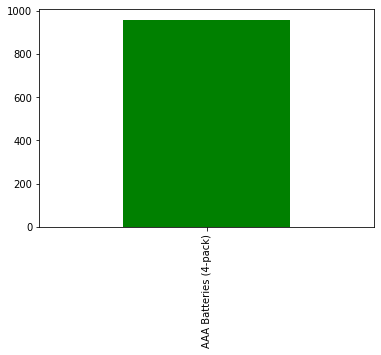

In [ ]:
col0_list=data_amazon[0].unique()
col0_list=col0_list.tolist()
for i in range(0,19):
  idx = data_amazon[0] == col0_list[i]
  col0_data = data_amazon[idx]
  col0_recommend=col0_data[1].value_counts()
  col0_recommend.plot(kind='bar',color='g')

# Recommendation Generator
This generator generates recommendations for inputted product

Products Available 

['Wired Headphones' 'Apple Airpods Headphones' 'Vareebadd Phone'
 'Google Phone' 'iPhone' 'Lightning Charging Cable' '27in FHD Monitor'
 'AA Batteries (4-pack)' '34in Ultrawide Monitor'
 'Bose SoundSport Headphones' '20in Monitor' '27in 4K Gaming Monitor'
 'USB-C Charging Cable' 'Macbook Pro Laptop' 'ThinkPad Laptop' 'LG Dryer'
 'Flatscreen TV' 'LG Washing Machine' 'AAA Batteries (4-pack)']

 Select one from above available Products 

Enter product you bought :34in Ultrawide Monitor

 Recommendations for this product are 



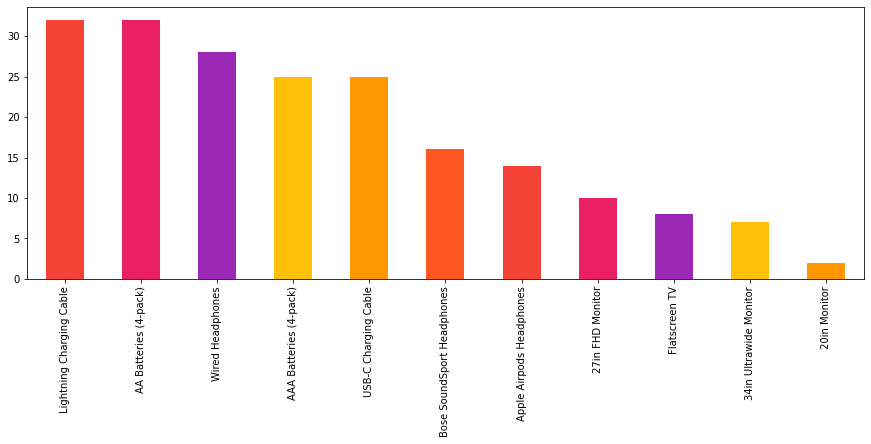

In [ ]:
print("Products Available \n")
print(data_amazon[0].unique())
print("\n Select one from above available Products \n")
prod_name=str(input("Enter product you bought :"))
try:
  prod_idx = data_amazon[0] == prod_name
  prod_data = data_amazon[prod_idx]
  prod_recommend=prod_data[1].value_counts()
  print("\n Recommendations for this product are \n")
  prod_recommend.plot(kind='bar',figsize=(15,5),color=colors)
except:
  print("\n Sorry! No recommendations available \n")